# E-commerce Pricing Analysis: A Statistical Approach
 Analyzing Price Distribution, Discounts, and Customer Ratings

## Objective


E-commerce platforms use dynamic pricing and discount strategies to attract customers. This project focuses on analyzing price trends, discount patterns, and customer ratings using real data scraped from Flipkart.

We aim to explore:
✔ How prices are distributed across different product categories.
✔ The relationship between discounts and ratings—does a higher discount mean better ratings?
✔ Which brands offer the highest discounts and how their pricing varies.



## 🌐 Real Data Scraping
The dataset used in this project is scraped in real-time from Flipkart using Selenium and BeautifulSoup. Instead of using pre-existing datasets, we collected fresh data on e-commerce pricing, making this analysis highly relevant and up-to-date.



 ## Key Analyses Performed
🔹 1. Price Distribution Analysis

Used histograms and boxplots to understand pricing variations.

Identified price outliers and categorized products into budget, mid-range, and premium segments.

🔹 2. Discount Trends

Analyzed how discount percentages vary across brands.

Checked if higher discounts correlate with better customer ratings.

Used scatter plots and correlation coefficients to find relationships.

🔹 3. Brand-Wise Pricing Insights

Compared pricing trends among major brands using bar charts.

Analyzed which brands provide the best value for money.

🔹 4. Statistical Tests for Validation

T-tests and ANOVA were used to check if price differences between brands are significant.

Chi-square tests were conducted to analyze the distribution of discounts across different brands.



## Tools & Technologies Used
✅ Python (Pandas, NumPy, Matplotlib, Seaborn)

✅ Web Scraping (Selenium, BeautifulSoup)

✅ Statistical Analysis (Descriptive Stats, Hypothesis Testing)

✅ Data Visualization (Seaborn & Matplotlib)

# step - 1 Scrape the data

In [11]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Set up Chrome WebDriver
chrome_driver_path = r"C:\Users\My PC\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"
service = Service(chrome_driver_path)
driver = webdriver.Chrome(service=service)

# Open Flipkart search page for "laptop"
search_query = "laptop"
base_url = "https://www.flipkart.com"
url = f"{base_url}/search?q={search_query}"
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Create CSV file
csv_file = "flipkart_laptops.csv"
with open(csv_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Product Name", "Original Price", "Final Price", "Discount", "Ratings", "Total Reviews"])  # Headers

# Function to extract and store product data
def extract_product_data():
    product_containers = driver.find_elements(By.XPATH, "//div[@class='KzDlHZ']")[:24]

    # Initialize lists
    product_names, original_prices, final_prices, product_discounts, ratings_dict, total_reviews_dict = [], [], [], [], {}, {}

    for container in product_containers:
        product_text = container.text.strip()
        product_names.append(product_text)

        # Extract total ratings & reviews
        try:
            total_review_elem = container.find_element(By.XPATH, "./following-sibling::div//span[@class='Wphh3N']")
            total_reviews_dict[product_text] = total_review_elem.text.strip()
        except:
            total_reviews_dict[product_text] = "NULL"

        # Extract individual ratings
        try:
            rating_elem = container.find_element(By.XPATH, "./following-sibling::div//div[@class='XQDdHH']")
            ratings_dict[product_text] = rating_elem.text.strip()
        except:
            ratings_dict[product_text] = "NULL"

    # Extract original price
    original_price_elements = driver.find_elements(By.CLASS_NAME, "yRaY8j.ZYYwLA")
    original_prices = [original_price_elements[i].text.replace("₹", "").strip() if i < len(original_price_elements) else "NULL" for i in range(24)]

    # Extract final price
    price_elements = driver.find_elements(By.CLASS_NAME, "Nx9bqj._4b5DiR")
    final_prices = [price_elements[i].text.replace("₹", "").strip() if i < len(price_elements) else "NULL" for i in range(24)]

    # Extract discount percentage
    discount_elements = driver.find_elements(By.CLASS_NAME, "UkUFwK")
    product_discounts = [discount_elements[i].text if i < len(discount_elements) else "NULL" for i in range(24)]

    # Save extracted data to CSV
    with open(csv_file, "a", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        for i in range(len(product_names)):
            writer.writerow([
                product_names[i] if i < len(product_names) else "NULL",
                original_prices[i] if i < len(original_prices) else "NULL",
                final_prices[i] if i < len(final_prices) else "NULL",
                product_discounts[i] if i < len(product_discounts) else "NULL",
                ratings_dict.get(product_names[i], "NULL"),
                total_reviews_dict.get(product_names[i], "NULL")
            ])

# Pagination Logic
page_count = 1
max_pages = 40  # Flipkart max pages

while page_count <= max_pages:
    extract_product_data()  # Extract data for the current page

    try:
        next_buttons = driver.find_elements(By.CLASS_NAME, "_9QVEpD")  # Next & Prev buttons have the same class

        if len(next_buttons) > 1:
            next_button = next_buttons[-1]  # Always pick the LAST one (Next button)
        else:
            next_button = next_buttons[0]  # If only one, it's the Next button

        next_page_link = next_button.get_attribute("href")

        if next_page_link:
            next_page_url = base_url + next_page_link if not next_page_link.startswith("http") else next_page_link
            print(f"Navigating to Page {page_count + 1}: {next_page_url}")
            driver.get(next_page_url)
            time.sleep(3)  # Reduce time to speed up
        else:
            print("No more pages found. Exiting.")
            break

    except (NoSuchElementException, IndexError):
        print("Pagination ended. No further pages found.")
        break

    page_count += 1  # Increment page count

# Close browser
driver.quit()
print(f"Scraping completed! Data saved in {csv_file}")


Navigating to Page 2: https://www.flipkart.com/search?q=laptop&page=2
Navigating to Page 3: https://www.flipkart.com/search?q=laptop&page=3
Navigating to Page 4: https://www.flipkart.com/search?q=laptop&page=4
Navigating to Page 5: https://www.flipkart.com/search?q=laptop&page=5
Navigating to Page 6: https://www.flipkart.com/search?q=laptop&page=6
Navigating to Page 7: https://www.flipkart.com/search?q=laptop&page=7
Navigating to Page 8: https://www.flipkart.com/search?q=laptop&page=8
Navigating to Page 9: https://www.flipkart.com/search?q=laptop&page=9
Navigating to Page 10: https://www.flipkart.com/search?q=laptop&page=10
Navigating to Page 11: https://www.flipkart.com/search?q=laptop&page=11
Navigating to Page 12: https://www.flipkart.com/search?q=laptop&page=12
Navigating to Page 13: https://www.flipkart.com/search?q=laptop&page=13
Navigating to Page 14: https://www.flipkart.com/search?q=laptop&page=14
Navigating to Page 15: https://www.flipkart.com/search?q=laptop&page=15
Navigati

# Clean  Data

### Extract company name

In [32]:

import pandas as pd

# Load the CSV file
df = pd.read_csv("flipkart_laptops.csv")  # Replace with your actual CSV filename

# Extract the company name (first word of the product name)
df["Company"] = df["Product Name"].apply(lambda x: str(x).split()[0] if pd.notnull(x) else "Unknown")

# Save the updated CSV
df.to_csv("flipkart_laptops_with_company.csv", index=False)

# Display some results
print(df[["Product Name", "Company"]].head())

                                        Product Name  Company
0  Acer Chromebook Plus Google AI Intel Core i3 1...     Acer
1  SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...  SAMSUNG
2  Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...     Acer
3  Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...   Lenovo
4  ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...     ASUS


In [33]:
df = pd.read_csv("flipkart_laptops_with_company.csv")  # Load the CSV file
df 

,Product Name,Original Price,Final Price,Discount,Ratings,Total Reviews,Company
0,Acer Chromebook Plus Google AI Intel Core i3 1...,"52,999","22,990",56% off,3.8,174 Ratings & 18 Reviews,Acer
1,SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...,"57,499","41,990",26% off,4.5,"2,682 Ratings & 339 Reviews",SAMSUNG
2,Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...,"87,499","68,990",21% off,4.3,272 Ratings & 39 Reviews,Acer
3,Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...,"1,04,490","70,371",32% off,4.3,"1,466 Ratings & 131 Reviews",Lenovo
4,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...,"69,990","42,190",39% off,4.2,"7,481 Ratings & 419 Reviews",ASUS
...,...,...,...,...,...,...,...
955,ASUS Vivobook S 15 OLED Intel EVO H-Series Int...,"49,990","73,990",36% off,3.8,13 Ratings & 2 Reviews,ASUS
956,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,"57,990","31,990",34% off,4.1,265 Ratings & 19 Reviews,ASUS
957,Lenovo IdeaPad 3 Intel Intel Core i3 11th Gen ...,"51,500","37,990",36% off,3.7,133 Ratings & 16 Reviews,Lenovo
958,HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...,"46,899","32,800",36% off,4.2,538 Ratings & 63 Reviews,HP


### splitting columns 

In [34]:
import re

# Function to extract ratings and reviews


import pandas as pd
import re

# Load CSV
df = pd.read_csv("flipkart_laptops_with_company.csv")

# Function to extract ratings and reviews
def extract_numbers(text):
    if pd.isna(text) or text == "NULL":  # Handle missing values safely
        return pd.NA, pd.NA  

    text = str(text).replace(",", "")  # Convert to string and remove commas
    match = re.findall(r'(\d+)', text)  # Find all numbers

    if len(match) == 2:
        return int(match[0]), int(match[1])  # First number is Ratings, second is Reviews
    elif len(match) == 1:
        return int(match[0]), pd.NA  # If only one number, assume it's Ratings
    else:
        return pd.NA, pd.NA  # No valid numbers found

# Convert 'Total Reviews' column to string before applying function
df['Total Reviews'] = df['Total Reviews'].astype(str)

# Apply function safely
df[['Total Ratings', 'Total Reviews Extracted']] = df['Total Reviews'].apply(lambda x: pd.Series(extract_numbers(x)))

# Save updated CSV
df.to_csv("flipkart_laptops_cleaned(1).csv", index=False)

# Print sample for debugging
print(df[['Total Reviews', 'Total Ratings', 'Total Reviews Extracted']].head())


                 Total Reviews Total Ratings Total Reviews Extracted
0     174 Ratings & 18 Reviews           174                      18
1  2,682 Ratings & 339 Reviews          2682                     339
2     272 Ratings & 39 Reviews           272                      39
3  1,466 Ratings & 131 Reviews          1466                     131
4  7,481 Ratings & 419 Reviews          7481                     419


In [35]:
df

,Product Name,Original Price,Final Price,Discount,Ratings,Total Reviews,Company,Total Ratings,Total Reviews Extracted
0,Acer Chromebook Plus Google AI Intel Core i3 1...,"52,999","22,990",56% off,3.8,174 Ratings & 18 Reviews,Acer,174,18
1,SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...,"57,499","41,990",26% off,4.5,"2,682 Ratings & 339 Reviews",SAMSUNG,2682,339
2,Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...,"87,499","68,990",21% off,4.3,272 Ratings & 39 Reviews,Acer,272,39
3,Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...,"1,04,490","70,371",32% off,4.3,"1,466 Ratings & 131 Reviews",Lenovo,1466,131
4,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...,"69,990","42,190",39% off,4.2,"7,481 Ratings & 419 Reviews",ASUS,7481,419
...,...,...,...,...,...,...,...,...,...
955,ASUS Vivobook S 15 OLED Intel EVO H-Series Int...,"49,990","73,990",36% off,3.8,13 Ratings & 2 Reviews,ASUS,13,2
956,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,"57,990","31,990",34% off,4.1,265 Ratings & 19 Reviews,ASUS,265,19
957,Lenovo IdeaPad 3 Intel Intel Core i3 11th Gen ...,"51,500","37,990",36% off,3.7,133 Ratings & 16 Reviews,Lenovo,133,16
958,HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...,"46,899","32,800",36% off,4.2,538 Ratings & 63 Reviews,HP,538,63


In [37]:
df = df.drop('Total Reviews', axis=1)

# Verify by printing the DataFrame
df

,Product Name,Original Price,Final Price,Discount,Ratings,Company,Total Ratings,Total Reviews Extracted
0,Acer Chromebook Plus Google AI Intel Core i3 1...,"52,999","22,990",56% off,3.8,Acer,174,18
1,SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...,"57,499","41,990",26% off,4.5,SAMSUNG,2682,339
2,Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...,"87,499","68,990",21% off,4.3,Acer,272,39
3,Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...,"1,04,490","70,371",32% off,4.3,Lenovo,1466,131
4,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...,"69,990","42,190",39% off,4.2,ASUS,7481,419
...,...,...,...,...,...,...,...,...
955,ASUS Vivobook S 15 OLED Intel EVO H-Series Int...,"49,990","73,990",36% off,3.8,ASUS,13,2
956,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,"57,990","31,990",34% off,4.1,ASUS,265,19
957,Lenovo IdeaPad 3 Intel Intel Core i3 11th Gen ...,"51,500","37,990",36% off,3.7,Lenovo,133,16
958,HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...,"46,899","32,800",36% off,4.2,HP,538,63


### Handle Missing Values

In [38]:
missing_values = df.isnull().sum()  
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name                 0
Original Price              30
Final Price                  4
Discount                     0
Ratings                    151
Company                      0
Total Ratings              144
Total Reviews Extracted    144
dtype: int64


In [39]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             960 non-null    object 
 1   Original Price           930 non-null    object 
 2   Final Price              956 non-null    object 
 3   Discount                 960 non-null    object 
 4   Ratings                  809 non-null    float64
 5   Company                  960 non-null    object 
 6   Total Ratings            816 non-null    object 
 7   Total Reviews Extracted  816 non-null    object 
dtypes: float64(1), object(7)
memory usage: 60.1+ KB
None


In [40]:
df['Final Price'] = df['Final Price'].astype(str).str.replace('[^\d.]', '', regex=True)  # Remove non-numeric characters
df['Final Price'] = pd.to_numeric(df['Final Price'], errors='coerce')  # Convert to float
print(df['Final Price'].dtype) 
print(df['Final Price'])

float64
0      22990.0
1      41990.0
2      68990.0
3      70371.0
4      42190.0
        ...   
955    73990.0
956    31990.0
957    37990.0
958    32800.0
959    29998.0
Name: Final Price, Length: 960, dtype: float64


In [41]:
df["Ratings"] = df["Ratings"].astype(str).str.replace(",", "").str.extract("(\d+)")[0]
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')  # Convert to numeric
# Remove non-numeric characters and convert to integer in one line for both columns
df['Total Ratings'] = pd.to_numeric(df['Total Ratings'].astype(str).str.replace('[^\d]', '', regex=True), errors='coerce')
df['Total Reviews Extracted'] = pd.to_numeric(df['Total Reviews Extracted'].astype(str).str.replace('[^\d]', '', regex=True), errors='coerce')


In [42]:
# Remove non-numeric characters and convert to integer
df['Discount'] = df['Discount'].astype(str).str.replace('[^\d]', '', regex=True)  # Keep only numbers
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')  # Convert to numeric
print(df['Discount'].dtype) 
print(df['Discount'])

int64
0      56
1      26
2      21
3      32
4      39
       ..
955    36
956    34
957    36
958    36
959    17
Name: Discount, Length: 960, dtype: int64


In [43]:
# Remove non-numeric characters and convert to integer
df['Original Price'] = df['Original Price'].astype(str).str.replace('[^\d]', '', regex=True)  # Keep only numbers
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')  # Convert to numeric
print(df['Original Price'].dtype) 
print(df['Original Price'])

float64
0       52999.0
1       57499.0
2       87499.0
3      104490.0
4       69990.0
         ...   
955     49990.0
956     57990.0
957     51500.0
958     46899.0
959         NaN
Name: Original Price, Length: 960, dtype: float64


In [44]:
# Calculate Original Price where it's missing
df['Original Price'] = df['Original Price'].fillna(df['Final Price'] / (1 - df['Discount']))

# Check if NaNs are handled
print(df['Original Price'].isnull().sum())

4


In [45]:
df

,Product Name,Original Price,Final Price,Discount,Ratings,Company,Total Ratings,Total Reviews Extracted
0,Acer Chromebook Plus Google AI Intel Core i3 1...,52999.000,22990.0,56,3.0,Acer,174.0,18.0
1,SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...,57499.000,41990.0,26,4.0,SAMSUNG,2682.0,339.0
2,Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...,87499.000,68990.0,21,4.0,Acer,272.0,39.0
3,Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...,104490.000,70371.0,32,4.0,Lenovo,1466.0,131.0
4,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...,69990.000,42190.0,39,4.0,ASUS,7481.0,419.0
...,...,...,...,...,...,...,...,...
955,ASUS Vivobook S 15 OLED Intel EVO H-Series Int...,49990.000,73990.0,36,3.0,ASUS,13.0,2.0
956,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,57990.000,31990.0,34,4.0,ASUS,265.0,19.0
957,Lenovo IdeaPad 3 Intel Intel Core i3 11th Gen ...,51500.000,37990.0,36,3.0,Lenovo,133.0,16.0
958,HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...,46899.000,32800.0,36,4.0,HP,538.0,63.0


In [46]:
df.dtypes


Product Name                object
Original Price             float64
Final Price                float64
Discount                     int64
Ratings                    float64
Company                     object
Total Ratings              float64
Total Reviews Extracted    float64
dtype: object

In [47]:
missing_values = df.isnull().sum()  
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name                 0
Original Price               4
Final Price                  4
Discount                     0
Ratings                    151
Company                      0
Total Ratings              144
Total Reviews Extracted    144
dtype: int64


## Replacing remaining Null Pricing with their mean 

In [48]:
# Fill remaining NaN values in Original Price with mean
df['Original Price'].fillna(df['Original Price'].mean(), inplace=True)

# Fill remaining NaN values in Final Price with mean
df['Final Price'].fillna(df['Final Price'].mean(), inplace=True)

# Check if any NaN values remain
print(df[['Original Price', 'Final Price']].isnull().sum())  # Should print 0 if all NaNs are filled


Original Price    0
Final Price       0
dtype: int64


In [49]:
df['Total Ratings'].fillna(0, inplace=True)
df['Total Reviews Extracted'].fillna(0, inplace=True)
df['Ratings'].fillna(0, inplace=True)

In [50]:
missing_values = df.isnull().sum()  
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name               0
Original Price             0
Final Price                0
Discount                   0
Ratings                    0
Company                    0
Total Ratings              0
Total Reviews Extracted    0
dtype: int64


In [51]:
df.to_csv("flipkart_laptops_cleaned(1).csv", index=False)

In [52]:
df.describe()

,Original Price,Final Price,Discount,Ratings,Total Ratings,Total Reviews Extracted
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,79197.749987,60695.554393,28.598958,3.248958,858.287500,71.119792
std,40523.929528,35403.133406,11.633283,1.453305,2275.630385,170.160426
min,-9415.000000,11990.000000,1.000000,0.000000,0.000000,0.000000
25%,52990.000000,35499.000000,20.000000,3.000000,10.750000,1.000000
50%,72990.000000,50999.000000,28.000000,4.000000,94.000000,9.500000
75%,95186.500000,73847.500000,36.000000,4.000000,575.250000,49.250000
max,329900.000000,308990.000000,58.000000,5.000000,17356.000000,1180.000000


In [53]:
df.info

<bound method DataFrame.info of                                           Product Name  Original Price  \
0    Acer Chromebook Plus Google AI Intel Core i3 1...       52999.000   
1    SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...       57499.000   
2    Acer Nitro V AMD Ryzen 7 Octa Core 7735HS - (1...       87499.000   
3    Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...      104490.000   
4    ASUS Vivobook 15 Intel Core i5 12th Gen 1235U ...       69990.000   
..                                                 ...             ...   
955  ASUS Vivobook S 15 OLED Intel EVO H-Series Int...       49990.000   
956  ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...       57990.000   
957  Lenovo IdeaPad 3 Intel Intel Core i3 11th Gen ...       51500.000   
958  HP 15s Intel Core i3 11th Gen 1125G4 - (8 GB/5...       46899.000   
959  HP FC0026AU AMD Ryzen 3 Quad Core 7320U - (8 G...       -1874.875   

     Final Price  Discount  Ratings  Company  Total Ratings  \
0        22990.0

### Mean And Median For Final Prices and Discount

In [54]:
mean_price = df['Final Price'].mean()
median_price = df['Final Price'].median()

mean_discount = df['Discount'].mean()
median_discount = df['Discount'].median()

print(f"Final Price - Mean: {mean_price}, Median: {median_price}")
print(f"Discount - Mean: {mean_discount}, Median: {median_discount}")

Final Price - Mean: 60695.55439330544, Median: 50999.0
Discount - Mean: 28.598958333333332, Median: 28.0


C:\Users\My PC\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


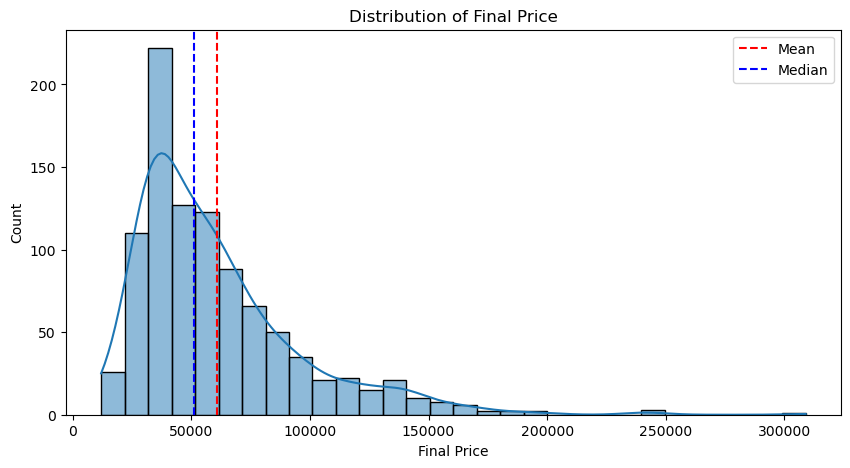

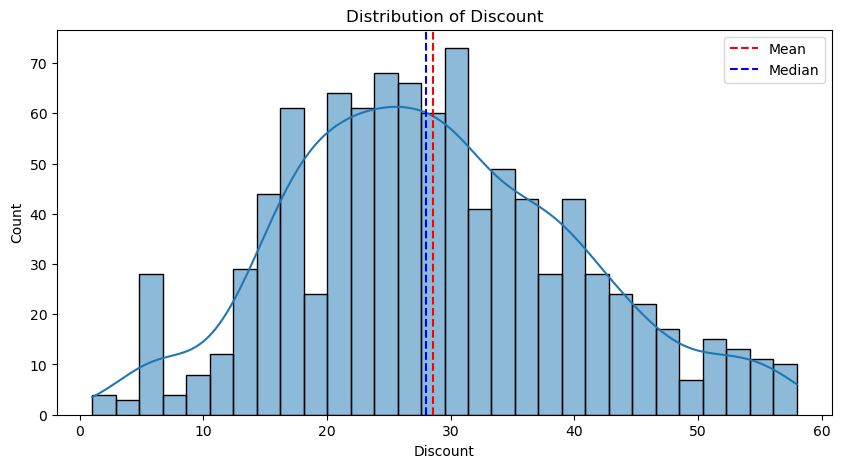

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Final Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Final Price'], bins=30, kde=True)
plt.axvline(mean_price, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_price, color='blue', linestyle='dashed', label='Median')
plt.title('Distribution of Final Price')
plt.legend()
plt.show()

# Histogram for Discount
plt.figure(figsize=(10, 5))
sns.histplot(df['Discount'], bins=30, kde=True)
plt.axvline(mean_discount, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_discount, color='blue', linestyle='dashed', label='Median')
plt.title('Distribution of Discount')
plt.legend()
plt.show()


#### observation

### Price Analysis


         Final Price
count     960.000000
mean    60695.554393
std     35403.133406
min     11990.000000
25%     35499.000000
50%     50999.000000
75%     73847.500000
max    308990.000000


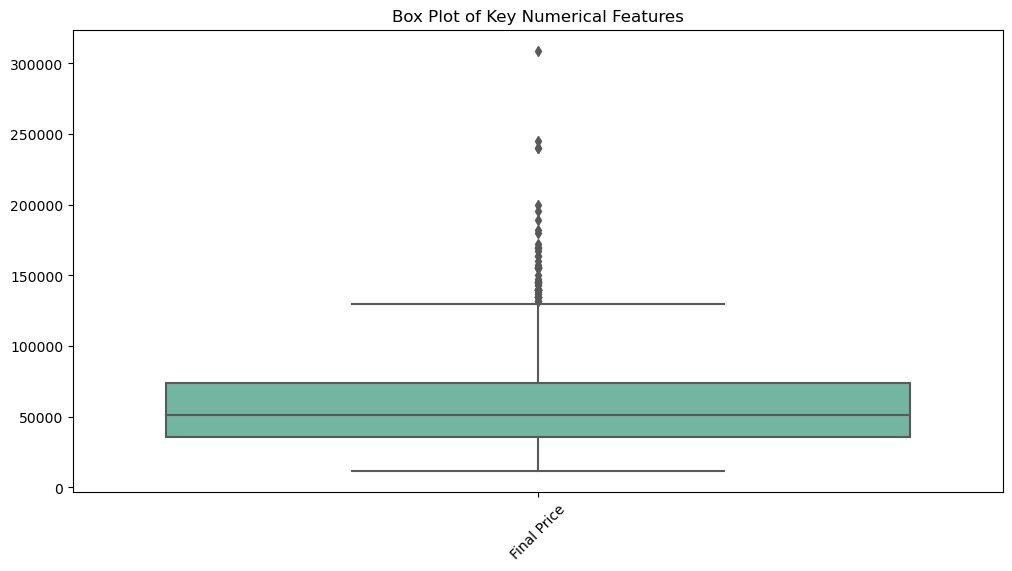

In [143]:
# Find Min, Max, and Percentiles
num_cols = ['Final Price']  # Update with your column names
stats_summary = df[num_cols].describe(percentiles=[0.25, 0.50, 0.75])  # Includes 25th, 50th (median), and 75th percentile

print(stats_summary)  # Display summary statistics

# Box Plot for Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title("Box Plot of Key Numerical Features")
plt.xticks(rotation=45)
plt.show()

**Observation : It suggests that their are some high end luxury laptops which starting  from 1.5 lacs and goes upto 3 lacs

         Discount
count  960.000000
mean    28.598958
std     11.633283
min      1.000000
25%     20.000000
50%     28.000000
75%     36.000000
max     58.000000


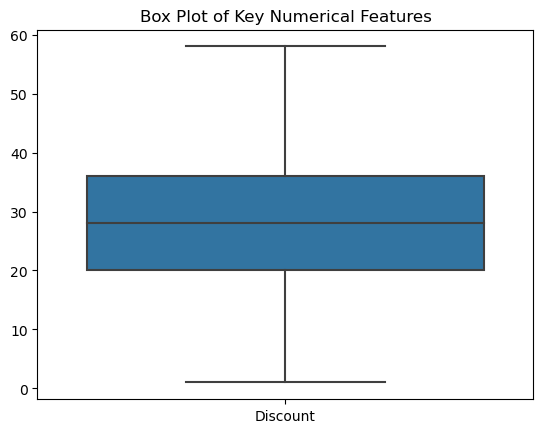

In [144]:
# Find Min, Max, and Percentiles
num_cols = ['Discount']  # Update with your column names
stats_summary = df[num_cols].describe(percentiles=[0.25, 0.50, 0.75])  # Includes 25th, 50th (median), and 75th percentile

print(stats_summary)  # Display summary statistics

# Box Plot for Visualization
sns.boxplot(data=df[num_cols])
plt.title("Box Plot of Key Numerical Features")
plt.show()

**Observation: This Shows that their are no outliers in Discountand it is evenly distributed among products

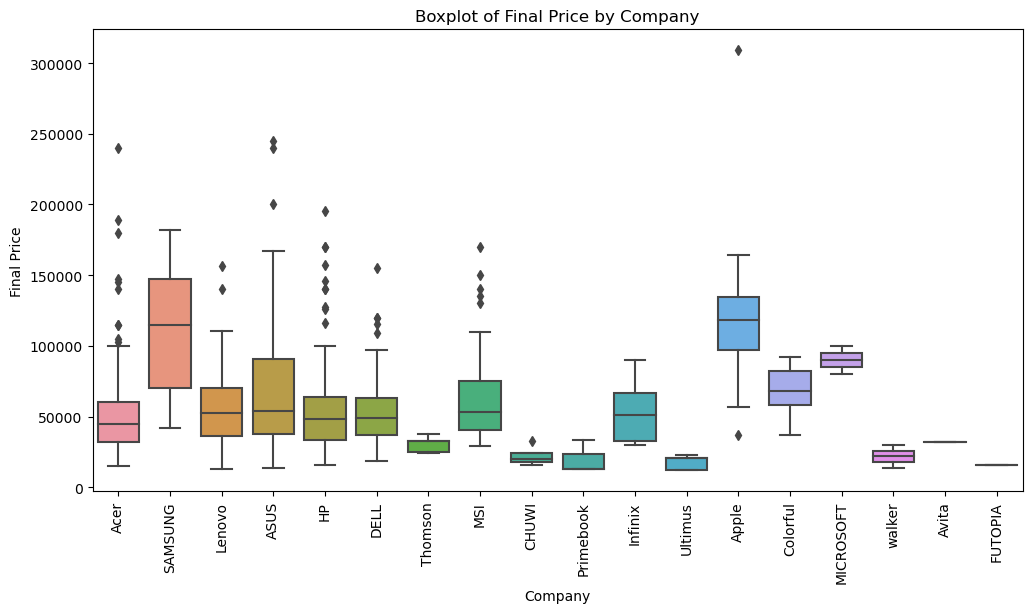

In [145]:
## Boxplot for final price vs company
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Final Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Boxplot of Final Price by Company")
plt.xlabel("Company")
plt.ylabel("Final Price")
plt.show()


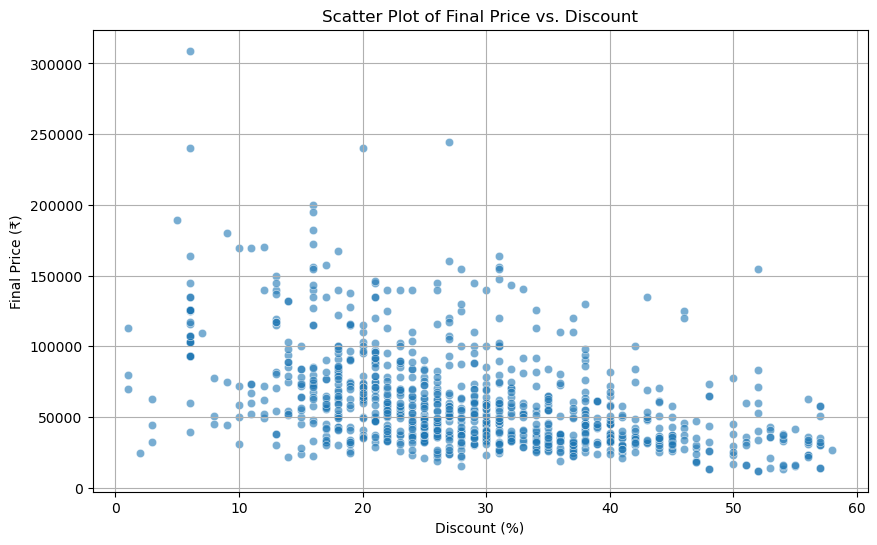

In [146]:
## Scatter plot for Final vs Discount
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Discount'], y=df['Final Price'], alpha=0.6)

plt.xlabel("Discount (%)")
plt.ylabel("Final Price (₹)")
plt.title("Scatter Plot of Final Price vs. Discount")
plt.grid(True)
plt.show()

## Ratings & Reviews Analysis

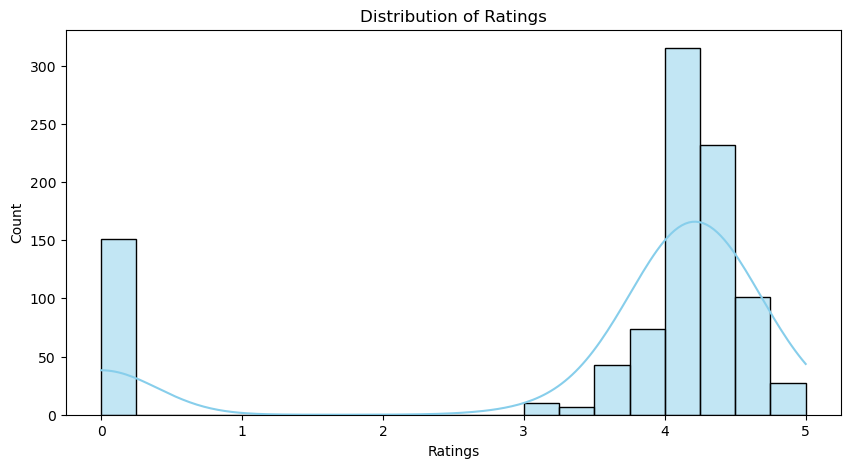

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (assuming you have it loaded as 'df')
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a CSV

## ------------------ 1️⃣ Distribution of Ratings (Histogram) ------------------
plt.figure(figsize=(10,5))
sns.histplot(df["Ratings"], bins=20, kde=True, color="skyblue")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


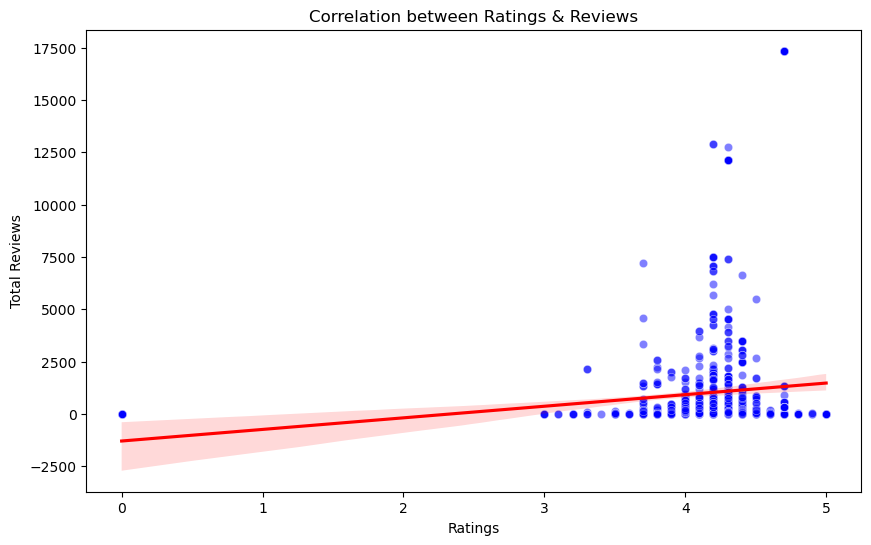

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert Ratings & Total Reviews to numeric (handle errors)
df["Ratings"] = pd.to_numeric(df["Ratings"], errors="coerce")
df["Total Reviews"] = df["Total Reviews"].astype(str).str.replace(",", "").str.extract("(\d+)")[0]
df["Total Reviews"] = pd.to_numeric(df["Total Reviews"], errors="coerce")

# Load dataset (assuming df is your DataFrame)
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a CSV

# Scatter plot of Ratings vs. Total Reviews
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Ratings"], y=df["Total Reviews"], alpha=0.5, color="blue")

# Add trendline (regression line)
sns.regplot(x=df["Ratings"], y=df["Total Reviews"], scatter=False, color='red')

plt.xlabel("Ratings")
plt.ylabel("Total Reviews")
plt.title("Correlation between Ratings & Reviews")
plt.show()


1.Products with higher ratings generally receive more reviews, but there's a lot of variability.

2.A few outliers exist, where some products have very high reviews despite average ratings.

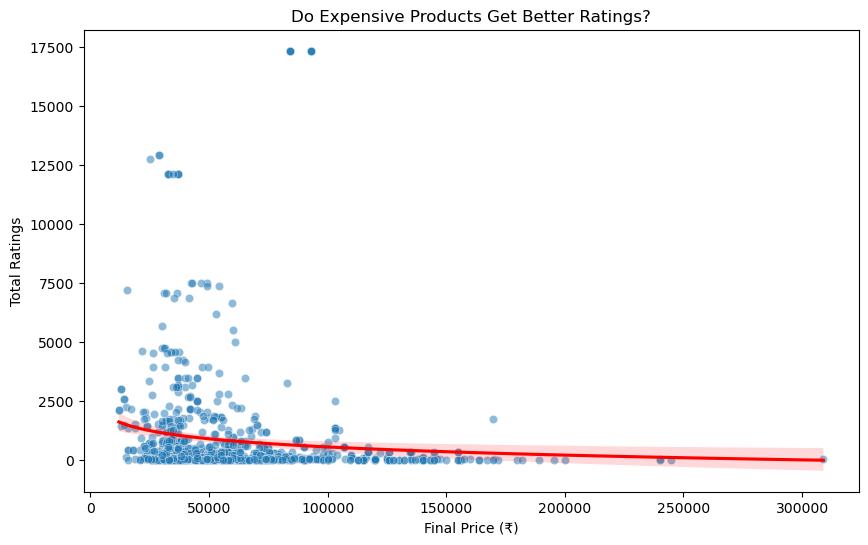

In [149]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Final Price"], y=df["Total Ratings"], alpha=0.5)

# Add a trendline using a regression curve
sns.regplot(x=df["Final Price"], y=df["Total Ratings"], scatter=False, color='red', logx=True)

plt.xlabel("Final Price (₹)")
plt.ylabel("Total Ratings")
plt.title("Do Expensive Products Get Better Ratings?")
plt.show()

## Brand Level Analysis

In [154]:
import pandas as pd



# Ensure necessary columns exist and drop missing values if necessary
df = df[['Company', 'Final Price', 'Original Price']].dropna()

# 1️⃣ Top 10 brands by number of listings
top_brands = df['Company'].value_counts().head(10)
print("Top 10 Brands by Number of Listings:\n", top_brands)

# 2️⃣ Average price per brand
avg_price_per_brand = df.groupby('Company')['Final Price'].mean().sort_values(ascending=False)
print("\nAverage Price Per Brand:\n", avg_price_per_brand.head(10))

# 3️⃣ Brands offering the highest discounts
df['Discount %'] = ((df['Original Price'] - df['Final Price']) / df['Original Price']) * 100
highest_discount_brands = df.groupby('Company')['Discount %'].mean().sort_values(ascending=False)
print("\nBrands Offering the Highest Discounts:\n", highest_discount_brands.head(10))


Top 10 Brands by Number of Listings:
 HP         238
Lenovo     176
ASUS       156
Acer       113
DELL       107
MSI         63
Apple       44
SAMSUNG     19
Infinix     16
Thomson      5
Name: Company, dtype: int64

Average Price Per Brand:
 Company
Apple        118438.590909
SAMSUNG      114228.315789
MICROSOFT     89990.000000
ASUS          67813.779195
Colorful      67390.000000
MSI           63826.793651
Lenovo        55753.077014
DELL          54032.808920
Acer          53779.465083
HP            53717.899160
Name: Final Price, dtype: float64

Brands Offering the Highest Discounts:
 Company
Apple      365.568885
MSI        156.639823
ASUS       134.712407
HP         106.488078
DELL        87.380130
walker      58.802775
Avita       57.896815
Acer        55.891826
FUTOPIA     55.570992
CHUWI       53.725860
Name: Discount %, dtype: float64


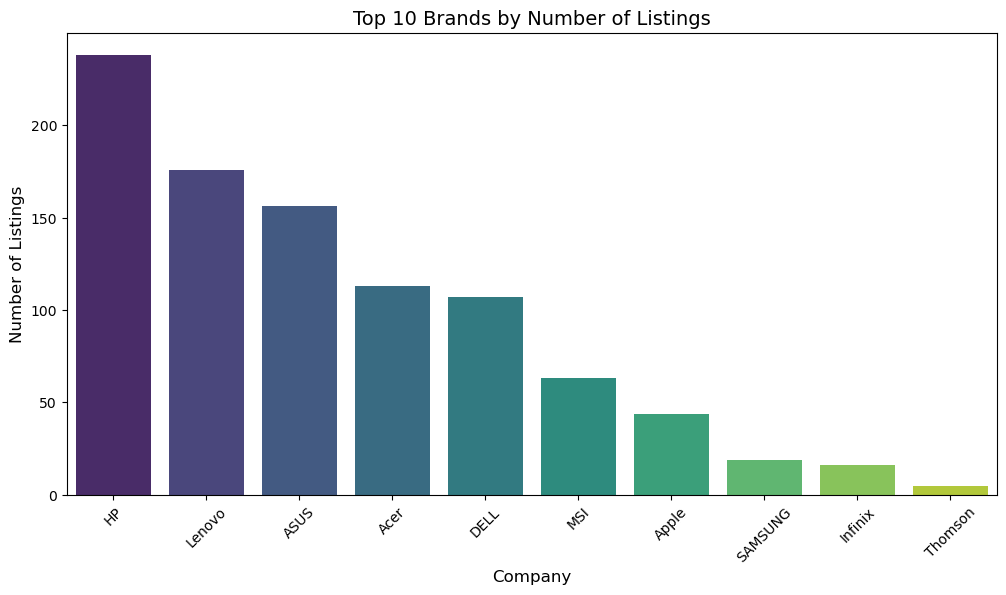

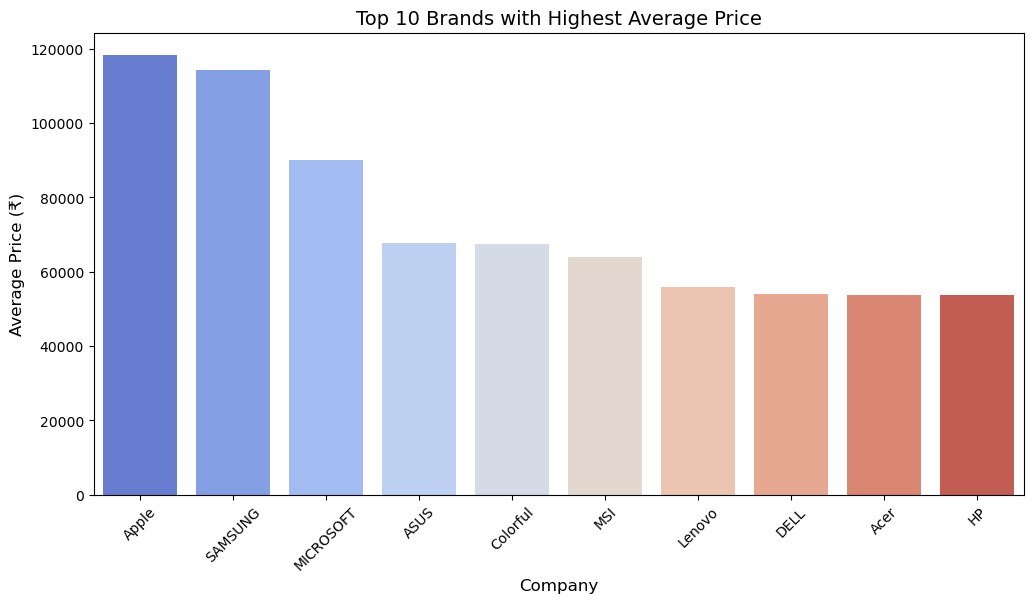

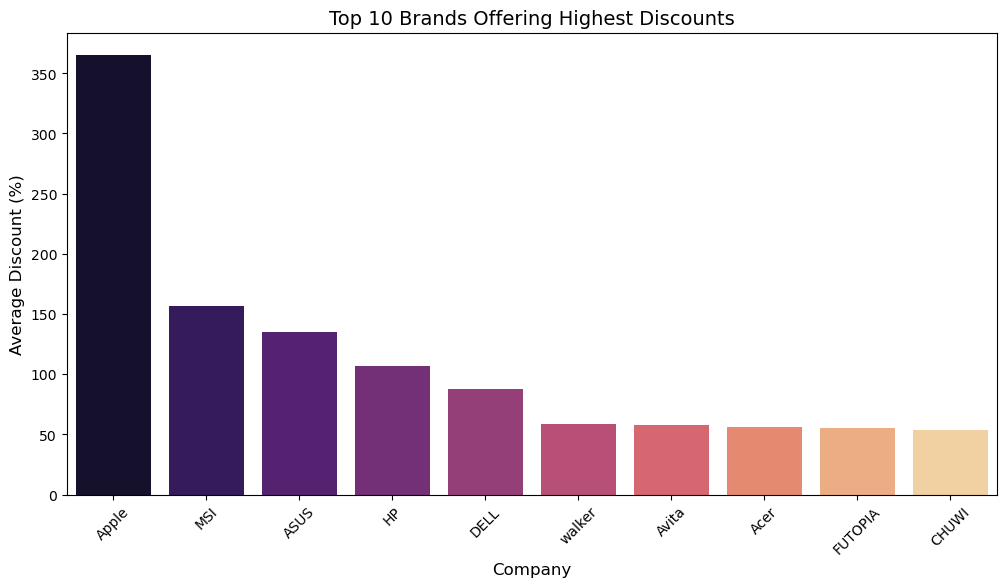

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Ensure necessary columns exist and drop missing values if necessary
df = df[['Company', 'Final Price', 'Original Price']].dropna()

# 1️⃣ Top 10 brands by number of listings
top_brands = df['Company'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xlabel("Company", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Top 10 Brands by Number of Listings", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Average price per brand (Top 10)
avg_price_per_brand = df.groupby('Company')['Final Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_brand.index, y=avg_price_per_brand.values, palette="coolwarm")
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Price (₹)", fontsize=12)
plt.title("Top 10 Brands with Highest Average Price", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Brands offering the highest discounts (Top 10)
df['Discount %'] = ((df['Original Price'] - df['Final Price']) / df['Original Price']) * 100
highest_discount_brands = df.groupby('Company')['Discount %'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=highest_discount_brands.index, y=highest_discount_brands.values, palette="magma")
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Discount (%)", fontsize=12)
plt.title("Top 10 Brands Offering Highest Discounts", fontsize=14)
plt.xticks(rotation=45)
plt.show()


## Statistical Analysis

In [161]:
df

,Company,Final Price,Original Price,Discount %
0,Acer,22990.0,52999.000,56.621823
1,SAMSUNG,41990.0,57499.000,26.972643
2,Acer,68990.0,87499.000,21.153385
3,Lenovo,70371.0,104490.000,32.652885
4,ASUS,42190.0,69990.000,39.719960
...,...,...,...,...
955,ASUS,73990.0,49990.000,-48.009602
956,ASUS,31990.0,57990.000,44.835316
957,Lenovo,37990.0,51500.000,26.233010
958,HP,32800.0,46899.000,30.062475


Index(['Product Name', 'Original Price', 'Final Price', 'Discount', 'Ratings',
       'Total Reviews', 'Company', 'Total Ratings', 'Total Reviews Extracted'],
      dtype='object')


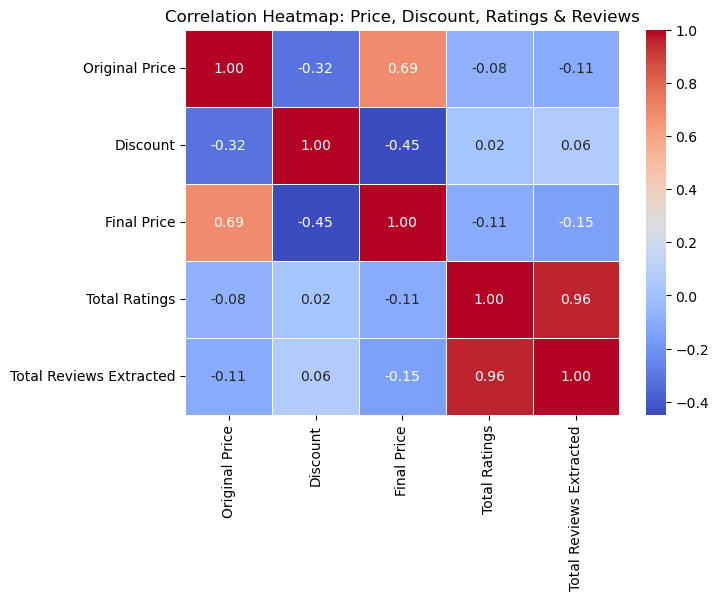

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "flipkart_laptops_cleaned(1).csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Check actual column names
print(df.columns)

# Fix column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Select relevant numeric columns (check column names carefully)
columns_to_analyze = ["Original Price", "Discount", "Final Price", "Total Ratings", "Total Reviews Extracted"]

# Ensure the columns exist
df_selected = df[columns_to_analyze].dropna()  # Drop missing values

# Convert columns to numeric (if needed)
df_selected = df_selected.apply(pd.to_numeric, errors="coerce")

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap: Price, Discount, Ratings & Reviews")
plt.show()


## T-TEST or ANOVA TEST

Shapiro-Wilk Test for HP: p-value = 0.0000000000
Shapiro-Wilk Test for Lenovo: p-value = 0.0000005995
Shapiro-Wilk Test for ASUS: p-value = 0.0000000000


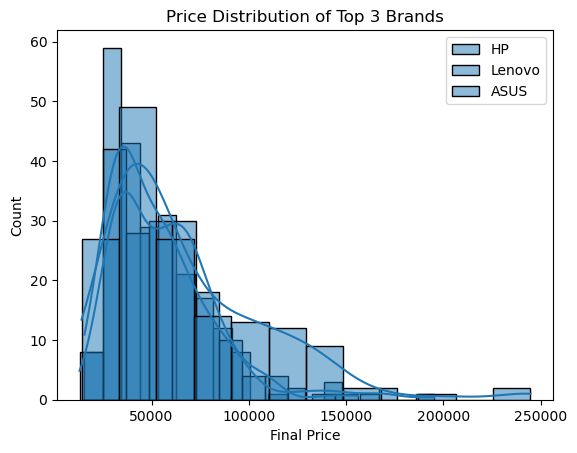

In [187]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 3 brands
top_3_brands = df['Company'].value_counts().index[:3]
df_top3 = df[df['Company'].isin(top_3_brands)]

# Normality test for each brand
for brand in top_3_brands:
    stat, p = shapiro(df_top3[df_top3['Company'] == brand]['Final Price'])
    print(f"Shapiro-Wilk Test for {brand}: p-value = {p:.10f}")

    # Plot distribution
    sns.histplot(df_top3[df_top3['Company'] == brand]['Final Price'], kde=True, label=brand)

plt.legend()
plt.title("Price Distribution of Top 3 Brands")
plt.show()


In [190]:
import pandas as pd
from scipy.stats import kruskal

# Load your dataset
df = pd.read_csv("flipkart_laptops_cleaned(1).csv")  # Replace with your actual file name

# Ensure column names are correct (adjust if necessary)
print(df.columns)

# Filter prices for the top 3 brands
hp_prices = df[df["Company"] == "HP"]["Final Price"].dropna()
lenovo_prices = df[df["Company"] == "Lenovo"]["Final Price"].dropna()
asus_prices = df[df["Company"] == "ASUS"]["Final Price"].dropna()

# Perform Kruskal-Wallis test
stat, p = kruskal(hp_prices, lenovo_prices, asus_prices)
print(f"Kruskal-Wallis Test p-value: {p:.5f}")

if p < 0.05:
    print("Significant difference in price between brands.")
else:
    print("No significant difference in price between brands.")


Index(['Product Name', 'Original Price', 'Final Price', 'Discount', 'Ratings',
       'Total Reviews', 'Company', 'Total Ratings', 'Total Reviews Extracted'],
      dtype='object')
Kruskal-Wallis Test p-value: 0.00264
Significant difference in price between brands.


# Buisness Analysis Questions

### Question:1  How do discount strategies impact customer engagement and conversions?

In [60]:
# step-1 Remove outliers:

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from 'Discount' and 'Final Price'
df = remove_outliers(df, 'Discount')
df = remove_outliers(df, 'Final Price')

In [69]:
# Step-2 performing t -test
from scipy import stats

# Hypothesis: Does discount significantly impact ratings?
discount_groups = df.groupby('Discount')['Total Reviews Extracted'].mean()

# Perform a t-test (if data is normally distributed) or an ANOVA (if comparing more than two groups)
# Let's assume we're testing two categories: high vs. low discount (example split at median discount)
median_discount = df['Discount'].median()
df['Discount Category'] = df['Discount'].apply(lambda x: 'High Discount' if x > median_discount else 'Low Discount')

# Perform t-test for 'Ratings' between high and low discount
group1 = df[df['Discount Category'] == 'High Discount']['Total Reviews Extracted']
group2 = df[df['Discount Category'] == 'Low Discount']['Total Reviews Extracted']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-test for Total Reviews between high and low discount: t-stat = {t_stat}, p-value = {p_value}')



T-test for Total Reviews between high and low discount: t-stat = 2.6356174523527645, p-value = 0.00854245571228591


### Since the p-value is less than 0.05, you reject the null hypothesis. This indicates that there is a statistically significant difference in the total number of reviews between the high and low discount groups.

Conclusion:
Discount strategies do have an impact on customer engagement as measured by the total number of reviews. Products with higher discounts tend to receive more reviews compared to products with lower discounts. This could be a sign that discounts are influencing customer behavior, making them more likely to leave reviews.

# Question 2: Which price segments generate the highest revenue and engagement?

In [73]:
# step :1 categorize the products into different price segments (low, medium, high) based on Final Price.
 # Low Price: Products below the 30th percentile
 # Medium Price: Products between the 30th and 70th percentile
 # High Price: Products above the 70th percentile

import pandas as pd

# Assuming df is your DataFrame with the 'Final Price' column
# Step 1: Calculate the 30th and 70th percentiles
quantiles = df['Final Price'].quantile([0.3, 0.7])

# Print quantiles to check the threshold values
print("Quantile Thresholds:")
print(quantiles)

# Step 2: Define bins based on the percentiles
bins = [0, quantiles[0.3], quantiles[0.7], float('inf')]  # Define ranges
labels = ['Low Price', 'Medium Price', 'High Price']  # Assign labels

# Step 3: Categorize the products into price segments
df['Price Segment'] = pd.cut(df['Final Price'], bins=bins, labels=labels, include_lowest=True)

# Step 4: Check the distribution of products in each segment
print(df['Price Segment'].value_counts())


Quantile Thresholds:
0.3    36990.0
0.7    63497.2
Name: Final Price, dtype: float64
Medium Price    344
Low Price       289
High Price      272
Name: Price Segment, dtype: int64


In [74]:
# step2: Calculate Revenue for each sEgment
# Assuming the number of units sold is inferred by the 'Total Reviews Extracted' or another column
# We use 'Final Price' multiplied by the 'Total Reviews Extracted' as a proxy for units sold.

df['Revenue'] = df['Final Price'] * df['Total Reviews Extracted']  # Assuming Total Reviews Extracted is a proxy for units sold

# Summarize the total revenue by Price Segment
revenue_by_segment = df.groupby('Price Segment')['Revenue'].sum().sort_values(ascending=False)

# Display the revenue by price segment
print(revenue_by_segment)


Price Segment
High Price      1.229519e+09
Medium Price    9.869180e+08
Low Price       9.810838e+08
Name: Revenue, dtype: float64


In [75]:
# step:3 Calculate Engagement for Each Segment

# Calculate the total engagement (total reviews extracted) by Price Segment
engagement_by_segment = df.groupby('Price Segment')['Total Reviews Extracted'].sum().sort_values(ascending=False)

# Display the total engagement by price segment
print(engagement_by_segment)

# If you also want to consider ratings, you can calculate the mean ratings for each segment:
avg_ratings_by_segment = df.groupby('Price Segment')['Ratings'].mean().sort_values(ascending=False)

# Display the average ratings by price segment
print(avg_ratings_by_segment)


Price Segment
Low Price       33363.0
Medium Price    20277.0
High Price      14278.0
Name: Total Reviews Extracted, dtype: float64
Price Segment
Medium Price    3.392442
High Price      3.308824
Low Price       3.214533
Name: Ratings, dtype: float64


In [77]:
#Step 4: Combine Revenue and Engagement
# Merge the revenue and engagement summaries into one dataframe
summary = pd.DataFrame({
    'Revenue': revenue_by_segment,
    'Engagement (Total Reviews Extracted)': engagement_by_segment,
    'Average Ratings': avg_ratings_by_segment
})

# Display the combined summary
summary


,Revenue,Engagement (Total Reviews Extracted),Average Ratings
Price Segment,,,
Low Price,9.810838e+08,33363.0,3.214533
Medium Price,9.869180e+08,20277.0,3.392442
High Price,1.229519e+09,14278.0,3.308824


## Conclusion:

High Price products generate the most revenue (₹1,229.52 Cr) but have the lowest engagement (14,278 reviews), likely due to fewer purchases at premium prices.

Low Price products have the highest engagement (33,363 reviews) but the lowest average rating (3.21), suggesting frequent purchases but lower customer satisfaction.

Medium Price products strike the best balance with strong revenue (₹986.92 Cr), moderate engagement (20,277 reviews), and the highest average rating (3.39), indicating the best perceived value for customers.

##### Recommendation: Focus on Medium Price products for growth and customer satisfaction, optimize High Price product engagement, and improve quality or manage expectations for Low Price products. 🚀

###### which brand is best in all these segments

In [78]:

# Count the number of products for each brand in each price segment
brand_distribution = df.groupby(['Price Segment', 'Company']).size().reset_index(name='Product Count')

# Find the most dominant brand in each segment
dominant_brands = brand_distribution.loc[brand_distribution.groupby('Price Segment')['Product Count'].idxmax()]

# Display results
print(dominant_brands)


   Price Segment Company  Product Count
8      Low Price      HP             87
26  Medium Price      HP             88
46    High Price  Lenovo             59


#### HP dominates the Low and Medium Price segments, while Lenovo leads in the High Price segment, indicating HP's strong mass-market appeal and Lenovo's premium market presence.

# Question: 4  Which brands offer the best price-to-value ratio?


In [79]:
# Group by brand and calculate average final price and ratings
brand_value = df.groupby('Company').agg({'Final Price': 'mean', 'Ratings': 'mean'}).reset_index()

# Calculate price-to-value ratio
brand_value['Price-to-Value Ratio'] = brand_value['Ratings'] / brand_value['Final Price']

# Sort brands by highest price-to-value ratio
best_value_brands = brand_value.sort_values(by='Price-to-Value Ratio', ascending=False)

# Display top brands offering the best value
print(best_value_brands)


      Company    Final Price   Ratings  Price-to-Value Ratio
13  Primebook   19893.333333  4.000000              0.000201
7     FUTOPIA   15990.000000  3.000000              0.000188
17     walker   21995.000000  3.000000              0.000136
16    Ultimus   17770.000000  2.400000              0.000135
4       CHUWI   22240.000000  2.500000              0.000112
15    Thomson   30590.000000  3.400000              0.000111
9     Infinix   51920.437500  3.937500              0.000076
1        Acer   47062.051910  3.560748              0.000076
8          HP   50506.627706  3.246753              0.000064
10     Lenovo   54690.583646  3.431034              0.000063
12        MSI   58069.966102  3.627119              0.000062
5    Colorful   67390.000000  4.000000              0.000059
6        DELL   53080.382589  3.122642              0.000059
0        ASUS   59136.136744  3.020979              0.000051
14    SAMSUNG   79742.800000  3.200000              0.000040
2       Apple  102227.67

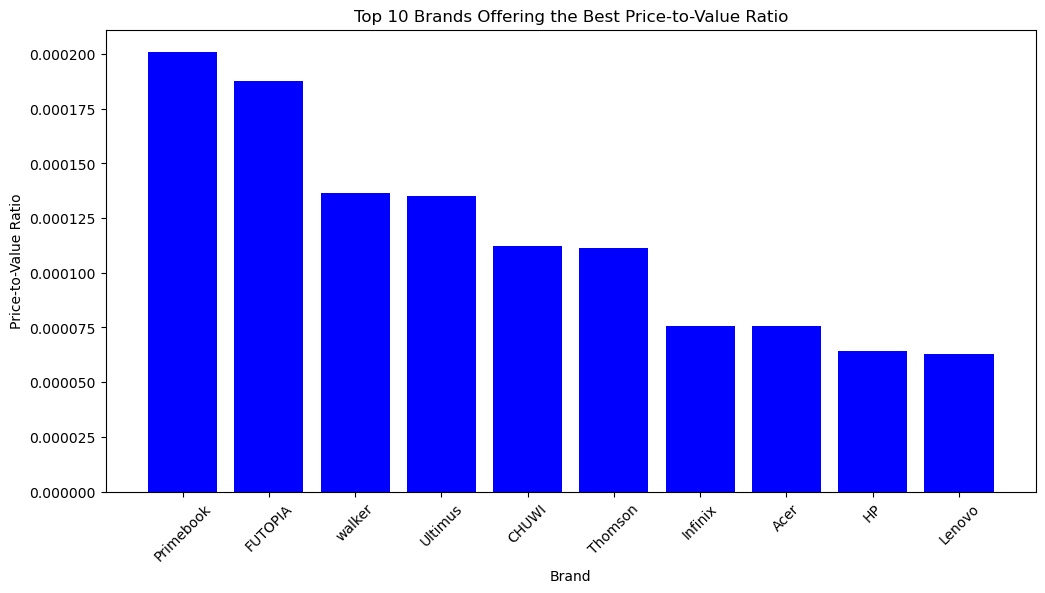

In [81]:

import matplotlib.pyplot as plt

# Select top 10 brands for better visualization
top_brands = best_value_brands.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_brands['Company'], top_brands['Price-to-Value Ratio'], color='blue')

# Add labels and title
plt.xlabel("Brand")
plt.ylabel("Price-to-Value Ratio")
plt.title("Top 10 Brands Offering the Best Price-to-Value Ratio")
plt.xticks(rotation=45)
plt.show()


### Conclusion: 
Budget brands like Primebook, FUTOPIA, and Walker provide the best value for money, while premium brands may be overpriced for the ratings they receive.